## Características para modelos de aprendizaje automatico para comunidades

In [1]:
import pandas as pd
import os
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords



In [2]:
directorio_actual = os.getcwd()
print("El directorio de trabajo actual es:", directorio_actual)

El directorio de trabajo actual es: g:\Unidades compartidas\Rocío doctorado\Proyecto NLP\Códigos


In [4]:
comunidades = pd.read_csv('G:/Unidades compartidas/Rocío doctorado/Proyecto NLP/Datos/comunidades.csv')
comunidades.head(5)

,Unnamed: 0,retweet_count,full_text,posicion,user_name,user_id,mencion,retweet,user_name_mencion,comunidad,degree_centrality,postura
0,0,14,RT @PTSarg: Contamos con una ventaja que ellos...,si,Luciana HL,3130302891,['PTSarg'],True,['PTS'],0,0.000266,1
1,1,0,En el fondo lo que les jode es nuestra liberta...,si,Luz Scarpati,2999619141,NaN,False,NaN,0,0.000154,1
2,2,308,RT @femialborto: A vos que decís #Salvemoslasd...,si,niña de tilcara🌰,828222093804371968,['femialborto'],True,['Abortencia'],3,0.000077,1
3,3,1369,RT @CampAbortoLegal: Diputadxs: ¿Qué significa...,si,Iaru,2933415531,['CampAbortoLegal'],True,['#13JAbortoLegal =š'],1,0.000081,1
4,4,16,RT @CarrioJovenes: Que no coincidamos en el te...,si,mau 💚,291352706,"['CarrioJovenes', 'ElisaCarrio']",True,"['Jóvenes con Carrió.', 'ElisaCarrio']",2,0.000056,0


In [5]:
comunidades.columns

Index(['Unnamed: 0', 'retweet_count', 'full_text', 'posicion', 'user_name',
       'user_id', 'mencion', 'retweet', 'user_name_mencion', 'comunidad',
       'degree_centrality', 'postura'],
      dtype='object')

In [6]:
comunidades_filtradas=comunidades[['full_text', 'postura', 'retweet_count']]
comunidades_filtradas.head()

,full_text,postura,retweet_count
0,RT @PTSarg: Contamos con una ventaja que ellos...,1,14
1,En el fondo lo que les jode es nuestra liberta...,1,0
2,RT @femialborto: A vos que decís #Salvemoslasd...,1,308
3,RT @CampAbortoLegal: Diputadxs: ¿Qué significa...,1,1369
4,RT @CarrioJovenes: Que no coincidamos en el te...,0,16


In [7]:
import re
import pandas as pd

# Función para limpiar los tweets
def clean_tweet(text):
    # Eliminar 'RT' al inicio del texto
    text = re.sub(r'^RT\s+', '', text)
    
    # Eliminar menciones (@usuario) y el ':' que pueda seguir
    text = re.sub(r'@\w+:\s*', '', text)
    
    # Eliminar cualquier otra mención sin el ':' y espacios innecesarios
    text = re.sub(r'@\w+', '', text)
    
    # Eliminar espacios extra generados por las eliminaciones
    text = text.strip()
    
    return text

# Aplicar la función de limpieza al DataFrame
comunidades_filtradas.loc[:, 'full_text_cleaned'] = comunidades_filtradas['full_text'].apply(clean_tweet)

# Crear nueva columna 'Question Mark': Si hay al menos un signo de interrogación (¿ o ?)
comunidades_filtradas.loc[:, 'Question Mark'] = comunidades_filtradas['full_text'].apply(lambda x: '?' in x or '¿' in x)

# Crear nueva columna 'Question Mark Count': Contar cuántos signos de interrogación hay (¿ o ?)
comunidades_filtradas.loc[:, 'Question Mark Count'] = comunidades_filtradas['full_text'].apply(lambda x: x.count('?') + x.count('¿'))

# Crear nueva columna 'Starts with Question Mark': Si el tweet empieza con al menos un signo de interrogación
comunidades_filtradas.loc[:, 'Starts with Question Mark'] = comunidades_filtradas['full_text'].apply(lambda x: x.strip().startswith('¿'))

# Crear nueva columna 'Ends with Mark Count': Si el tweet termina con al menos un signo de interrogación
comunidades_filtradas.loc[:, 'Ends with Mark Count'] = comunidades_filtradas['full_text'].apply(lambda x: x.strip().endswith('?'))

# Crear nueva columna 'Upper Ratio': Ratio de letras mayúsculas vs letras totales
comunidades_filtradas.loc[:, 'Upper Ratio'] = comunidades_filtradas['full_text'].apply(lambda x: sum(1 for c in x if c.isupper()) / len(x) if len(x) > 0 else 0)

# Crear nueva columna 'Exclamation Mark': Si hay al menos un signo de admiración
comunidades_filtradas.loc[:, 'Exclamation Mark'] = comunidades_filtradas['full_text'].apply(lambda x: '!' in x or '¡' in x)

# Crear nueva columna 'Exclamation Mark Count': Contar cuántos signos de admiración hay
comunidades_filtradas.loc[:, 'Exclamation Mark Count'] = comunidades_filtradas['full_text'].apply(lambda x: x.count('!') + x.count('¡'))

# Crear nueva columna 'Ellipsis Occurrence': Si hay 3 o más puntos seguidos
comunidades_filtradas.loc[:, 'Ellipsis Occurrence'] = comunidades_filtradas['full_text'].apply(lambda x: '...' in x)

# Crear nueva columna 'Hashtag Presence': Presencia de hashtags
comunidades_filtradas.loc[:, 'Hashtag Presence'] = comunidades_filtradas['full_text'].apply(lambda x: bool(re.search(r'#\w+', x)))

# Crear nueva columna 'Text Length': Largo del texto sin hashtags, URLs, ni menciones de cuentas de Twitter
def limpiar_texto(texto):
    texto_sin_hashtags_urls = re.sub(r'(@\w+|http\S+|#\w+)', '', texto)  # Remueve hashtags, URLs y menciones
    return len(texto_sin_hashtags_urls.strip())

comunidades_filtradas.loc[:, 'Text Length'] = comunidades_filtradas['full_text'].apply(limpiar_texto)

# Crear nueva columna 'URL Count': Cantidad de URLs en el texto
comunidades_filtradas.loc[:, 'URL Count'] = comunidades_filtradas['full_text'].apply(lambda x: len(re.findall(r'http\S+', x)))

# Crear nueva columna 'Quotes': Si hay palabras entre comillas
comunidades_filtradas.loc[:, 'Quotes'] = comunidades_filtradas['full_text'].apply(lambda x: bool(re.search(r'["“”]', x)))

comunidades_filtradas


C:\Users\Usuario\AppData\Local\Temp\ipykernel_16112\3913469646.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comunidades_filtradas.loc[:, 'full_text_cleaned'] = comunidades_filtradas['full_text'].apply(clean_tweet)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_16112\3913469646.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comunidades_filtradas.loc[:, 'Question Mark'] = comunidades_filtradas['full_text'].apply(lambda x: '?' in x or '¿' in x)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_16112\3

,full_text,postura,retweet_count,full_text_cleaned,Question Mark,Question Mark Count,Starts with Question Mark,Ends with Mark Count,Upper Ratio,Exclamation Mark,Exclamation Mark Count,Ellipsis Occurrence,Hashtag Presence,Text Length,URL Count,Quotes
0,RT @PTSarg: Contamos con una ventaja que ellos...,1,14,Contamos con una ventaja que ellos no tienen: ...,False,0,False,False,0.071429,False,0,False,True,116,0,False
1,En el fondo lo que les jode es nuestra liberta...,1,0,En el fondo lo que les jode es nuestra liberta...,False,0,False,False,0.114943,False,0,False,True,47,0,False
2,RT @femialborto: A vos que decís #Salvemoslasd...,1,308,A vos que decís #Salvemoslasdosvidas te pido q...,False,0,False,False,0.028571,False,0,False,True,108,0,False
3,RT @CampAbortoLegal: Diputadxs: ¿Qué significa...,1,1369,Diputadxs: ¿Qué significa para ustedes una muj...,True,2,False,False,0.135714,False,0,False,True,71,0,False
4,RT @CarrioJovenes: Que no coincidamos en el te...,0,16,Que no coincidamos en el tema del aborto con ...,False,0,False,False,0.050360,False,0,False,False,113,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503335,RT @NoAlAborto19: @danielscioli me bloqueo por...,0,10,me bloqueo porque le duele la verdad. En sus c...,False,0,False,False,0.042857,False,0,False,False,114,0,False
503336,RT @unidadprovida: “Hoy nuestra deuda es con l...,0,36,“Hoy nuestra deuda es con la mujeres más pobre...,False,0,False,False,0.021429,False,0,False,False,126,0,True
503337,"RT @lasmarias1234: #ArgentinaEsProvida"" #NoAlA...",0,115,"#ArgentinaEsProvida"" #NoAlAbortoEnArgentina #S...",False,0,False,False,0.107143,False,0,False,True,67,0,True
503338,RT @marianoobarrio: Esta inmensa maravilla fue...,0,174,Esta inmensa maravilla fue sacrificada hoy en ...,False,0,False,False,0.021583,False,0,False,False,124,0,False


In [38]:
comunidades_filtradas.to_csv('G:/Unidades compartidas/Rocío doctorado/Proyecto NLP/Datos/Caracteristicas_comunidades.csv')

## Obtencion de unigramas

Preprocesamiento de los textos para utilizarlos como entrada en los modelos de aprendizaje automático

In [8]:
# Asegúrate de tener el paquete de stopwords en español
nltk.download('stopwords')
df_preproces=pd.DataFrame()
# Inicializar el stemmer
stemmer = SnowballStemmer('spanish')
stop_words = set(stopwords.words('spanish'))

def clean_tweet(tweet):
    # Eliminar 'RT' al inicio del texto (opcional, si quieres eliminar retweets)
    # tweet = re.sub(r'^RT\s+', '', tweet)
    
    # Eliminar menciones (@usuario), URLs y caracteres no alfabéticos
    tweet = re.sub(r'@\w+|http\S+', '', tweet)  # Eliminar menciones y URLs
    
    # Reemplazar '#' con una cadena vacía para conservar las palabras de los hashtags
    tweet = re.sub(r'#(\w+)', r'\1', tweet)  # Eliminar solo el símbolo '#'
    
    # Tokenizar el tweet y aplicar el stemmer
    tokens = tweet.split()
    tokens = [stemmer.stem(word) for word in tokens if word.isalpha() and word not in stop_words]
    
    return ' '.join(tokens)

# Suponiendo que tienes un DataFrame 'df' con una columna 'full_text_cleaned' y una columna 'etiqueta' (la clase)
df_preproces['cleaned_tweet'] = comunidades_filtradas['full_text_cleaned'].apply(clean_tweet)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
df_preproces['cleaned_tweet']

0                              cont ventaj conviccion fuerz
1         en fond jod libert novotencontralasmujer abort...
2         a vos dec salvemoslasdosv pid escuch intent ab...
3         signif usted muj novotencontralasmujer abortol...
4                  que coincid tem abort cambi respet admir
                                ...                        
503335                bloque duel en campañ pas event grand
503336          deud mujer pobr hoy muer mujer quer ten hij
503337                 noalabortoenargentin hac años comenz
503338    esta inmens maravill sacrific hoy nombr presio...
503339         gaston pierd tiemp hay q concentr q salg ley
Name: cleaned_tweet, Length: 503340, dtype: object

In [10]:
df_preproces['cleaned_tweet']
df_preproces['postura']=comunidades_filtradas['postura']

In [11]:
df_preproces['postura'].value_counts()

postura
1    326701
0    176639
Name: count, dtype: int64

Modelo de clasificación: el texto se convierte en vectores numéricos usando TF-IDF, y luego se entrena una regresión logística para predecir a qué clase pertenece cada tweet

In [12]:
# Separar las características y las etiquetas
X = df_preproces['cleaned_tweet']
y = df_preproces['postura']  # Asegúrate de que esta columna contiene las clases

# Dividir el dataset en conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el pipeline para vectorización y regresión logística
pipeline = make_pipeline(TfidfVectorizer(), LogisticRegression(multi_class='ovr', max_iter=1000))

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Evaluar el modelo
accuracy = pipeline.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')


c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.88


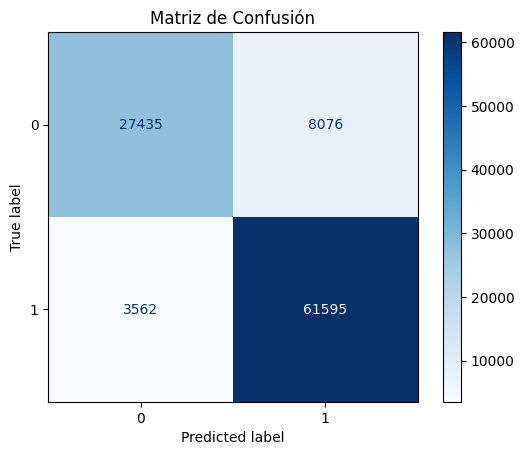

In [13]:
# Hacer predicciones
y_pred = pipeline.predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()

Las 20 palabras con mayores coeficientes (en valor absoluto)

In [14]:
model = pipeline.named_steps['logisticregression']
vectorizer = pipeline.named_steps['tfidfvectorizer']

# Obtener los nombres de las características
feature_names = vectorizer.get_feature_names_out()

# Obtener los coeficientes del modelo
coefficients = model.coef_[0]  # Para un modelo binario

# Crear un DataFrame para almacenar las características y sus coeficientes
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Ordenar el DataFrame por el valor absoluto de los coeficientes
coef_df['AbsCoefficient'] = np.abs(coef_df['Coefficient'])
top_features = coef_df.sort_values(by='AbsCoefficient', ascending=False)

# Obtener las 10 características con mayor peso
top_20_features = top_features.head(20)

print("Las 20 características más importantes:")
top_20_features

Las 20 características más importantes:


,Feature,Coefficient,AbsCoefficient
13285,noalabortoenargentin,-8.081729,8.081729
12589,mmm,7.750569,7.750569
235,abortolegaly,7.096457,7.096457
6563,elijamoslasdosv,-6.801737,6.801737
8408,funcionari,-6.413533,6.413533
9960,inmovil,-5.739372,5.739372
10084,interamerican,5.606126,5.606126
17946,solucion,-5.112716,5.112716
18700,titul,5.026207,5.026207
16633,resist,5.009681,5.009681


In [15]:
unigram_df = pd.DataFrame(top_20_features[['Feature', 'Coefficient']])
# Extraer solo las palabras de top_20_features
top_features_words = unigram_df['Feature'].tolist()
# Crear un nuevo vectorizador usando solo las palabras de top_20_features
custom_vectorizer = TfidfVectorizer(vocabulary=top_features_words)

# Ajustar y transformar el DataFrame original
X_custom = custom_vectorizer.fit_transform(df_preproces['cleaned_tweet'])

# Convertir la matriz resultante a un DataFrame
X_custom_df = pd.DataFrame(X_custom.toarray(), columns=custom_vectorizer.get_feature_names_out(), index=df_preproces.index)

# Agregar las nuevas características al DataFrame original
df_unigramas = pd.concat([df_preproces, X_custom_df], axis=1)

# Mostrar el DataFrame original con las nuevas columnas
print("\nDataFrame Original con Unigramas de Mayor Peso:")
df_unigramas.columns



DataFrame Original con Unigramas de Mayor Peso:


Index(['cleaned_tweet', 'postura', 'noalabortoenargentin', 'mmm',
       'abortolegaly', 'elijamoslasdosv', 'funcionari', 'inmovil',
       'interamerican', 'solucion', 'titul', 'resist', 'reirs',
       'multitudinari', 'interfier', 'viej', 'comit', 'tuitaz',
       'argentinaesprov', 'oracion', 'medicxs', 'esi'],
      dtype='object')

In [20]:
df_unigramas.to_csv('g:/Unidades compartidas/Rocío doctorado/Proyecto NLP/Datos/df_unigramas.csv', index=False)